#  Supervised Learning on CIKM dataset. Linear Regression.

In this project we will train a model that uses a Linear Regressor to  predict short-term rainfall amount based on reflectivity radar images.

## Dataset

The traing dataset *train.txt*, contains 10.000 locations. For each location we have the radar image of an area of $101 km^2$ at four different heights. Therefore we say that we have four  RadarLayers. These four RadarLayers consitutes a RadarStack. A RadarStack can be interpreted as a snapshot of the athmospere in a particular slot of time. For 2 hour we have been taking these snapshots (or RadarStacks) every 8 minutes and therefore we have 15 RadarStacks for each location. Finally the label is the ground precipitation at position (50,50) 

## Data Exploration

### Statistical Analysis


Statistics for train.txt dataset:

Minimum label: 0.0
Maximum label: 138.4
Mean label: 15.5454
Median label 8.0
Standard deviation of label: 15.855781198658804


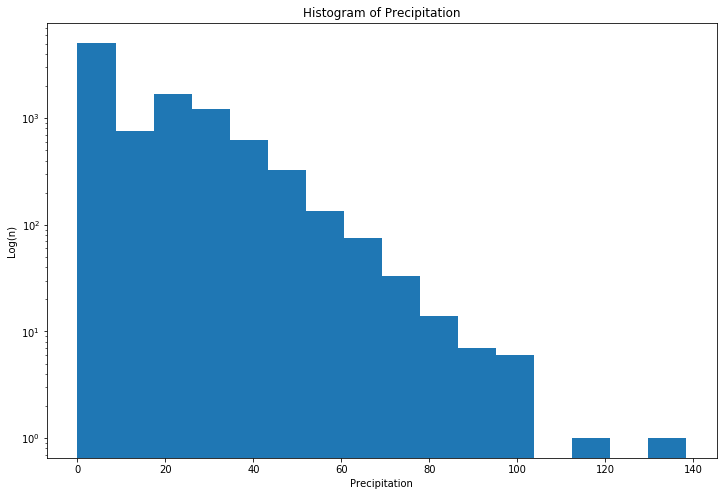

In [10]:
from radarplot.CIKM import CIKM
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Pretty display for notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

N = 10000
cikm = CIKM('../data/train.txt', '../data/train.index')
idlabels = [n for n in cikm.getIdLabelRange(0, N, sorted=False, reversed=False)]
mapids = [n[0] for n in idlabels]
labels = [n[1] for n in idlabels]
data = pd.DataFrame(labels, mapids, ['label'])

# Minimum label of the data
minimum_label = data.min()

# Maximum label of the data
maximum_label = data.max()

# Mean label of the data
mean_label = data.mean()

# Median label of the data
median_label = data.median()

# Standard deviation of prices of the data
std_label = data.std()

# Show the calculated statistics
print("Statistics for train.txt dataset:\n")
print("Minimum label: {}".format(float(minimum_label)))
print("Maximum label: {}".format(float(maximum_label)))
print("Mean label: {}".format(float(mean_label)))
print("Median label {}".format(float(median_label)))
print("Standard deviation of label: {}".format(float(std_label)))

# the histogram of the data
plt.title(r'Histogram of Precipitation')
plt.xlabel('Precipitation')
plt.ylabel('Log(n)')
plt.hist(data['label'], bins=16, log=True)
plt.show()


### Visualizing the labels dispersion in train.txt

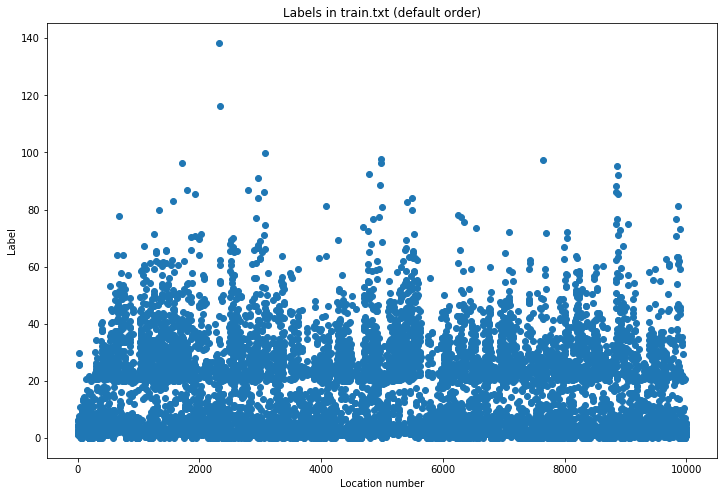

In [4]:
plt.title('Labels in train.txt (default order)')
plt.xlabel('Location number')
plt.ylabel('Label')
plt.scatter(np.arange(N), labels)
plt.show()

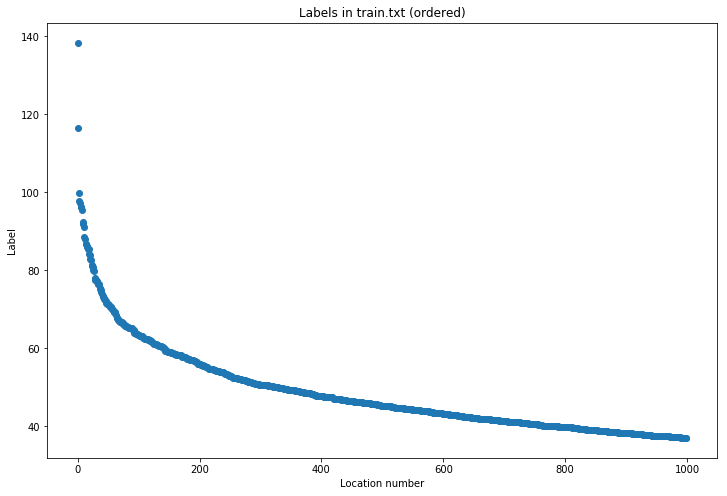

In [20]:
N = 1000
labels = [label for idmap, label in cikm.getIdLabelRange(0, N, sorted=True, reversed=True)]
plt.title('Labels in train.txt (ordered)')
plt.xlabel('Location number')
plt.ylabel('Label')
plt.scatter(np.arange(N), labels)
plt.show()

Loading data...
Learning...


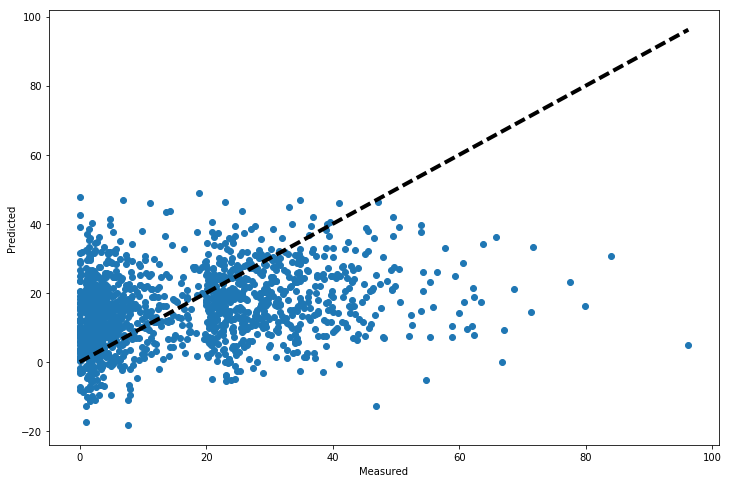

RMSE = 16.167331395724993


In [3]:
from radarplot.CIKM import CIKM
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cross_validation
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse
from sklearn.model_selection import cross_val_predict
import random
           
# Pretty display for notebooks
%matplotlib inline
plt.rcParams['figure.figsize'] = (12, 8)

N = 10000 # Total number of dataponts
n = 1500    # Number of samples

cikm = CIKM('../data/train.txt', '../data/train.index')
lr = LinearRegression()
X = []
y = []

print('Loading data...')

random.seed(1)
for i in random.sample(range(0, N), n):
    r = cikm.getRadar(i, sorted=False, reversed=False)
    X.append(r.getAllLayerFeatures())
    y.append(r.label)
X = np.array(X)
y = np.array(y)

#features_train, features_test, labels_train, labels_test = cross_validation.train_test_split(
 #   X, y, test_size = 0.2, random_state = 2)

print("Learning...")

predicted = cross_val_predict(lr, X, y, cv=5)
plt.scatter(y, predicted)
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.show()
rmse = np.sqrt(mse(y, predicted))
print("RMSE = {}".format(rmse))